In [23]:
# 윈도우
%matplotlib notebook
import warnings
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
from matplotlib.font_manager import fontManager
import squarify
import matplotlib

for font in fontManager.ttflist:
    if 'Na' in font.name:
        print(font.name)
        
warnings.filterwarnings(action='ignore')
plt.rc('font', family='08SeoulNamsan')
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.color'] = 'r'

Arial Narrow
Arial Narrow
Arial Narrow
Arial Narrow


In [1]:
#맥
import pandas as pd
import warnings
import missingno as msno
import numpy as np
import os
import matplotlib
from scipy import stats
from matplotlib.image import imread
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import squarify 
from matplotlib import rc
rc('font', family = 'AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings(action='ignore')

os.chdir('/Users/hankiho/Downloads/weather-master/유통&소셜 데이터')

In [2]:
weather = pd.read_csv("weather.csv", encoding ='CP949', parse_dates=['date.wt'])
weather_seoul = weather[weather['region_01.wt']=='서울특별시'] 
yellowdust = pd.read_csv('yellowdust.csv', encoding='cp949', skiprows = [0,1,2], parse_dates=['일자'])
yellowdust = yellowdust[yellowdust['지점명']=='서울'] 

In [4]:
weather.head(1)

,date.wt,region_id,region_01.wt,region_02.wt,temp_max,wind_max,temp_min,temp_avg,rhumid_avg,wa_avg,rain_sum
0,2016-01-01,98,경기도,동두천시,6.5,3.8,-6.4,-0.2,74.0,0.9,0.0


In [3]:
# 칼럼별 이름 변경
weather_seoul.rename(columns={weather_seoul.columns[0] : '날짜',
                        weather_seoul.columns[1] : '지역번호',
                        weather_seoul.columns[2] : '지역',
                        weather_seoul.columns[3] : '지역구',
                        weather_seoul.columns[4] : '최대기온',
                        weather_seoul.columns[5] : '최대풍속',
                        weather_seoul.columns[6] : '최소기온',
                        weather_seoul.columns[7] : '평균기온',
                        weather_seoul.columns[8] : '평균상대습도',
                        weather_seoul.columns[9] : '평균풍속',
                        weather_seoul.columns[10] : '총강수량'}, inplace=True)
yellowdust.rename(columns={'일자':'날짜'}, inplace=True) # 칼럼 이름 변경
yellowdust.drop(['지점번호', '지점명'], axis=1, inplace=True) # 필요없는 칼럼 삭제

In [4]:
weather_seoul.drop('평균상대습도', axis=1, inplace=True) # 거의 절반 정도로 결측치가 많은 평균상대습도 변수 제거
weather_seoul = weather_seoul.interpolate(method='values') # 데이터 프레임 값에 선형으로 비례하는 결측값 보간

In [8]:
def rainfall(x):
    if x==0:
        return 'N'
    else:
        return 'Y' # 강수량이 0이면 'N', 아니면 'Y'로 표시

In [9]:
weather_seoul['강수유무'] = weather_seoul['총강수량'].apply(rainfall) # 강수유무 칼럼 추가

In [10]:
weather_seoul['일교차'] = weather_seoul['최대기온'] - weather_seoul['최소기온'] # 일교차(최대기온-최소기온) 변수 추가

In [11]:
weather_avg = weather_seoul.groupby(['날짜']).mean()
weather_avg.reset_index(inplace=True)

In [12]:
weather_avg = pd.merge(weather_avg, yellowdust,how='outer') # 미세먼지농도 변수 추가

In [13]:
weekday_dict = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
weather_avg = weather_avg.replace({'dayofweek':weekday_dict})

In [14]:
# 미세먼지 결측치 보간
weather_avg['미세먼지농도(㎍/㎥)'] = weather_avg['미세먼지농도(㎍/㎥)'].interpolate(method='values')

In [15]:
weather_avg.head() # 요일 문자열로

,날짜,지역번호,최대기온,최대풍속,최소기온,평균기온,평균풍속,총강수량,일교차,미세먼지농도(㎍/㎥)
0,2016-01-01,406.68,4.928,2.608,-2.576,1.832,0.980,0.0,7.504,56.0
1,2016-01-02,406.68,10.088,3.100,2.572,6.472,1.296,0.0,7.516,42.0
2,2016-01-03,406.68,9.516,2.648,4.468,6.592,0.924,0.0,5.048,86.0
3,2016-01-04,406.68,6.784,4.120,-2.060,2.800,2.132,0.0,8.844,73.0
4,2016-01-05,406.68,1.592,3.660,-3.824,-1.760,1.704,0.0,5.416,31.0


In [16]:
weather_avg.isnull().sum()

날짜             0
지역번호           0
최대기온           0
최대풍속           0
최소기온           0
평균기온           0
평균풍속           0
총강수량           0
일교차            0
미세먼지농도(㎍/㎥)    0
dtype: int64

1. 평균기온

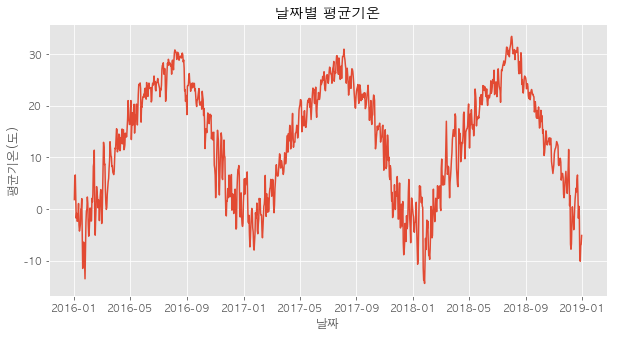

In [17]:
plt.figure(figsize=(10,5))
plt.plot(weather_avg['날짜'], weather_avg['평균기온'])
plt.title('날짜별 평균기온')
plt.xlabel('날짜')
plt.ylabel('평균기온(도)')
plt.show()

2. 월강수량

In [18]:
def separate_date(data):
    data["year"] = data["날짜"].dt.year
    data["month"] = data["날짜"].dt.month
    data["day"] = data["날짜"].dt.day
    data["dayofweek"] = data["날짜"].dt.dayofweek # 날짜를 년, 월, 일, 요일로 나누기
separate_date(weather_avg)

weekday_dict = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
weather_avg = weather_avg.replace({'dayofweek':weekday_dict})
weather_avg.set_index('날짜', inplace=True)
weather_month = weather_avg.resample(rule='M').mean()

3. 일교차

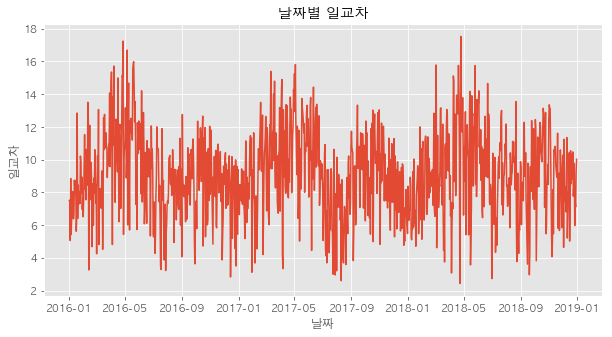

In [19]:
plt.figure(figsize=(10,5))
plt.plot(weather_avg.index, weather_avg['일교차'])
plt.title('날짜별 일교차')
plt.xlabel('날짜')
plt.ylabel('일교차')
plt.show() 

4. 평균풍속

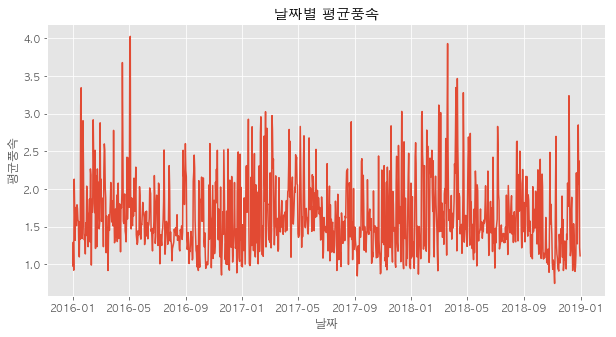

In [20]:
plt.figure(figsize=(10,5))
plt.plot(weather_avg.index, weather_avg['평균풍속'])
plt.title('날짜별 평균풍속')
plt.xlabel('날짜')
plt.ylabel('평균풍속')
plt.show() # 날짜별 평균풍속 그래프

5. 미세먼지농도

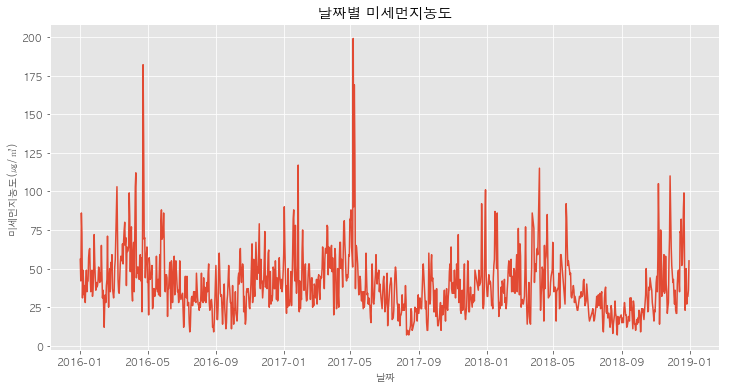

In [21]:
plt.figure(figsize=(12,6))
plt.plot(weather_avg.index, weather_avg['미세먼지농도(㎍/㎥)'])
plt.title('날짜별 미세먼지농도')
plt.xlabel('날짜', fontsize=10)
plt.ylabel('미세먼지농도(㎍/㎥)', fontsize=10)
plt.show() # 날짜별 미세먼지농도(㎍/㎥)

6. 상대습도

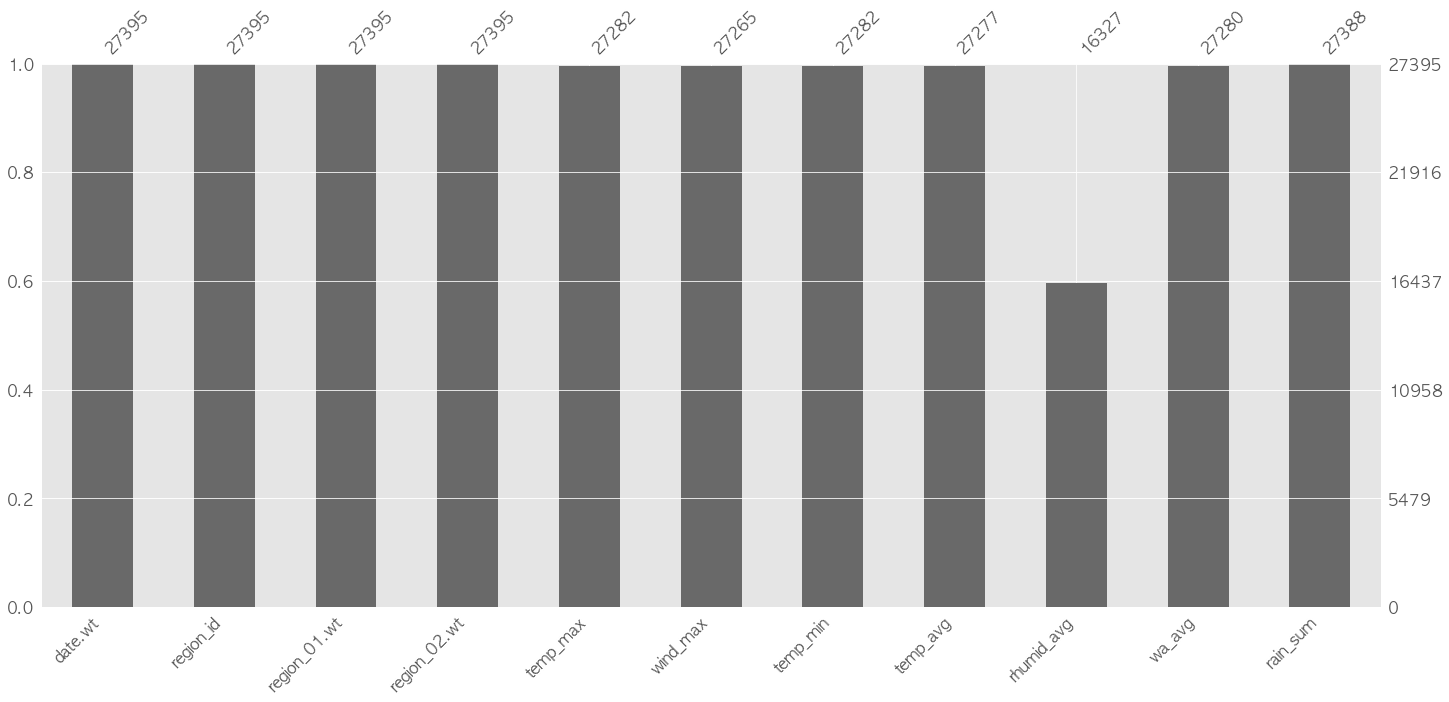

In [22]:
# 결측치 확인
weather = pd.read_csv("weather.csv", encoding ='CP949', parse_dates=['date.wt'])
weather_seoul = weather[weather['region_01.wt']=='서울특별시'] 
msno.bar(weather_seoul)
plt.show()

In [23]:
weather_seoul = weather_seoul.interpolate(method='values') # 데이터 프레임 값에 선형으로 비례하는 결측값 보간
weather_avg = weather_seoul.groupby(['date.wt']).mean()

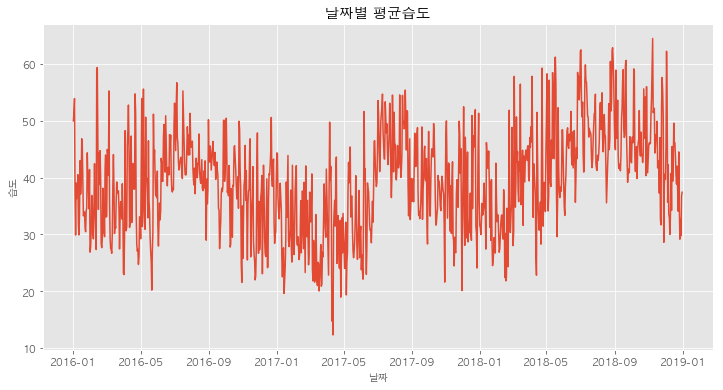

In [24]:
plt.figure(figsize=(12,6))
plt.plot(weather_avg.index, weather_avg['rhumid_avg'])
plt.title('날짜별 평균습도')
plt.xlabel('날짜', fontsize=10)
plt.ylabel('습도', fontsize=10)
plt.show() 

In [23]:
# 데이터 저장
#weather_avg = weather_avg.reset_index()
#weather_avg.to_csv('/Users/hankiho/Desktop/weather_avg.csv', index = False, encoding = "utf-8-sig")